In [76]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth
from mlxtend.preprocessing import TransactionEncoder

In [77]:
df = pd.read_csv("/content/Online Retail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [78]:
df.shape

(541909, 8)

In [79]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [80]:
df.dropna(subset=["Description" , "CustomerID"], inplace = True)

In [81]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [82]:
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]
df = df[df['Quantity'] > 0]

In [83]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [84]:
transactions = df.groupby('InvoiceNo')['Description'].apply(list).tolist()

print("\nSample Transactions:")
for t in transactions[:5]:
  print(t)


Sample Transactions:
['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', 'SET 7 BABUSHKA NESTING BOXES', 'GLASS STAR FROSTED T-LIGHT HOLDER']
['HAND WARMER UNION JACK', 'HAND WARMER RED POLKA DOT']
['ASSORTED COLOUR BIRD ORNAMENT', "POPPY'S PLAYHOUSE BEDROOM ", "POPPY'S PLAYHOUSE KITCHEN", 'FELTCRAFT PRINCESS CHARLOTTE DOLL', 'IVORY KNITTED MUG COSY ', 'BOX OF 6 ASSORTED COLOUR TEASPOONS', 'BOX OF VINTAGE JIGSAW BLOCKS ', 'BOX OF VINTAGE ALPHABET BLOCKS', 'HOME BUILDING BLOCK WORD', 'LOVE BUILDING BLOCK WORD', 'RECIPE BOX WITH METAL HEART', 'DOORMAT NEW ENGLAND']
['JAM MAKING SET WITH JARS', 'RED COAT RACK PARIS FASHION', 'YELLOW COAT RACK PARIS FASHION', 'BLUE COAT RACK PARIS FASHION']
['BATH BUILDING BLOCK WORD']


In [85]:
te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_data, columns=te.columns_)

In [86]:
df.head()

,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,TRELLIS COAT RACK,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,12 PENCILS TALL TUBE WOODLAND,12 PINK HEN+CHICKS IN BASKET,12 PINK ROSE PEG PLACE SETTINGS,12 RED ROSE PEG PLACE SETTINGS,15 PINK FLUFFY CHICKS IN BOX,15CM CHRISTMAS GLASS BALL 20 LIGHTS,16 PC CUTLERY SET PANTRY DESIGN,16 PIECE CUTLERY SET PANTRY DESIGN,18PC WOODEN CUTLERY SET DISPOSABLE,2 DAISIES HAIR COMB,2 PICTURE BOOK EGGS EASTER BUNNY,2 PICTURE BOOK EGGS EASTER CHICKS,2 PICTURE BOOK EGGS EASTER DUCKS,20 DOLLY PEGS RETROSPOT,200 BENDY SKULL STRAWS,200 RED + WHITE BENDY STRAWS,3 BIRDS CANVAS SCREEN,3 BLACK CATS W HEARTS BLANK CARD,3 DRAWER ANTIQUE WHITE WOOD CABINET,3 GARDENIA MORRIS BOXED CANDLES,3 HEARTS HANGING DECORATION RUSTIC,3 HOOK HANGER MAGIC GARDEN,3 HOOK PHOTO SHELF ANTIQUE WHITE,3 PIECE SPACEBOY COOKIE CUTTER SET,3 PINK HEN+CHICKS IN BASKET,...,WRAP RED VINTAGE DOILY,WRAP SUKI AND FRIENDS,WRAP SUMMER ROSE DESIGN,WRAP VINTAGE LEAF DESIGN,WRAP VINTAGE PETALS DESIGN,WRAP WEDDING DAY,"WRAP, BILLBOARD FONTS DESIGN","WRAP, CAROUSEL",YELLOW BREAKFAST CUP AND SAUCER,YELLOW COAT RACK PARIS FASHION,YELLOW DRAGONFLY HELICOPTER,YELLOW EASTER EGG HUNT START POST,YELLOW FELT HANGING HEART W FLOWER,YELLOW FLOWERS FELT HANDBAG KIT,YELLOW GIANT GARDEN THERMOMETER,YELLOW METAL CHICKEN HEART,YELLOW PINK FLOWER DESIGN BIG BOWL,YELLOW POT PLANT CANDLE,YELLOW SHARK HELICOPTER,YELLOW/BLUE RETRO RADIO,YELLOW/ORANGE FLOWER DESIGN PLATE,YELLOW/PINK FLOWER DESIGN BIG MUG,YOU'RE CONFUSING ME METAL SIGN,YULETIDE IMAGES GIFT WRAP SET,YULETIDE IMAGES S/6 PAPER BOXES,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FINISH 15CM PLANTER POTS,ZINC FOLKART SLEIGH BELLS,ZINC HEART FLOWER T-LIGHT HOLDER,ZINC HEART LATTICE 2 WALL PLANTER,ZINC HEART LATTICE CHARGER LARGE,ZINC HEART LATTICE CHARGER SMALL,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC HEART LATTICE TRAY OVAL,ZINC HEARTS PLANT POT HOLDER,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC PLANT POT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

In [87]:
frequent_itemsets = apriori(df, min_support=0.05, use_colnames = True)
print(frequent_itemsets)

     support                              itemsets
0   0.074180       (ASSORTED COLOUR BIRD ORNAMENT)
1   0.051845               (HEART OF WICKER SMALL)
2   0.086319             (JUMBO BAG RED RETROSPOT)
3   0.056754             (LUNCH BAG  BLACK SKULL.)
4   0.052115                 (LUNCH BAG CARS BLUE)
5   0.050227             (LUNCH BAG PINK POLKADOT)
6   0.069486             (LUNCH BAG RED RETROSPOT)
7   0.053302          (LUNCH BAG SPACEBOY DESIGN )
8   0.052169     (NATURAL SLATE HEART CHALKBOARD )
9   0.055514     (PACK OF 72 RETROSPOT CAKE CASES)
10  0.052870     (PAPER CHAIN KIT 50'S CHRISTMAS )
11  0.074450                       (PARTY BUNTING)
12  0.059290                             (POSTAGE)
13  0.091929            (REGENCY CAKESTAND 3 TIER)
14  0.061826   (SET OF 3 CAKE TINS PANTRY DESIGN )
15  0.054111                      (SPOTTY BUNTING)
16  0.106334  (WHITE HANGING HEART T-LIGHT HOLDER)


In [88]:
frequent_itemsets = fpgrowth(df, min_support=0.05, use_colnames=True)
print(frequent_itemsets)

     support                              itemsets
0   0.106334  (WHITE HANGING HEART T-LIGHT HOLDER)
1   0.074180       (ASSORTED COLOUR BIRD ORNAMENT)
2   0.059290                             (POSTAGE)
3   0.052870     (PAPER CHAIN KIT 50'S CHRISTMAS )
4   0.069486             (LUNCH BAG RED RETROSPOT)
5   0.055514     (PACK OF 72 RETROSPOT CAKE CASES)
6   0.052169     (NATURAL SLATE HEART CHALKBOARD )
7   0.051845               (HEART OF WICKER SMALL)
8   0.086319             (JUMBO BAG RED RETROSPOT)
9   0.053302          (LUNCH BAG SPACEBOY DESIGN )
10  0.050227             (LUNCH BAG PINK POLKADOT)
11  0.056754             (LUNCH BAG  BLACK SKULL.)
12  0.052115                 (LUNCH BAG CARS BLUE)
13  0.091929            (REGENCY CAKESTAND 3 TIER)
14  0.074450                       (PARTY BUNTING)
15  0.061826   (SET OF 3 CAKE TINS PANTRY DESIGN )
16  0.054111                      (SPOTTY BUNTING)


# DT

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [90]:
dt = pd.read_csv("/content/iris.csv")
dt.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [91]:
dt.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [92]:
X = dt.drop("species", axis=1)
Y = dt["species"]

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [94]:
dt_classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [95]:
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [96]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [97]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [98]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [99]:
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

cm1 = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm1)

Accuracy: 100.00%
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Linear Regression

In [100]:
from sklearn.linear_model import LinearRegression

In [106]:
lr = pd.read_csv("/content/iris.csv")

In [108]:
X = lr.drop("species", axis=1)
Y = lr["species"]

In [115]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y = le.fit_transform(Y)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [117]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [118]:
y_pred = model.predict(X_test)

In [120]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 0.04
R2 Score: 0.95


# logistic regression

In [123]:
lrs = pd.read_csv("/content/iris.csv")

In [125]:
X = lrs.drop("species", axis = 1)
Y = lrs["species"]

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [129]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [131]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



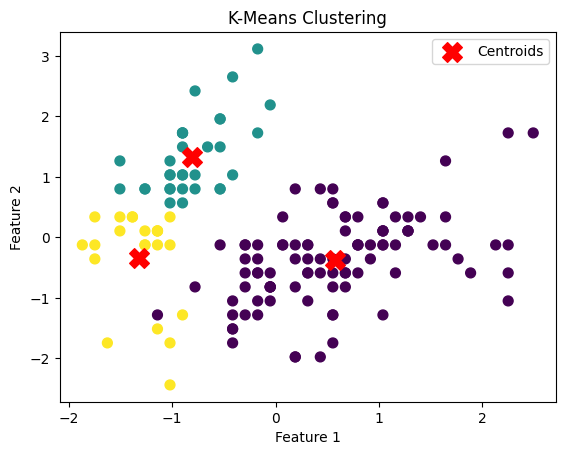

Cluster Centers:
[[ 0.57100359 -0.36600236  0.69108416  0.66322635]
 [-0.80601877  1.33577362 -1.28618375 -1.21026347]
 [-1.31926109 -0.34584225 -1.14482725 -1.1336954 ]]


In [132]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

lrs["Cluster"] = kmeans.labels_

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

print("Cluster Centers:")
print(kmeans.cluster_centers_)

# Ensemble Techniques

In [133]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize individual models
model1 = LogisticRegression(max_iter=200)
model2 = DecisionTreeClassifier(random_state=42)

# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', model1),
    ('dt', model2)
], voting='soft')  # Use 'hard' for majority voting

# Train the ensemble
voting_clf.fit(X_train, y_train)

# Evaluate the ensemble
y_pred = voting_clf.predict(X_test)
print("Voting Classifier Accuracy:", accuracy_score(y_test, y_pred))

Voting Classifier Accuracy (Without SVC): 1.0


In [138]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# Initialize the base model (e.g., Decision Tree)
base_model = DecisionTreeClassifier(random_state=42)

# Create a Bagging Classifier
bagging_clf = BaggingClassifier(estimator=base_model, n_estimators=10, random_state=42)

# Train the ensemble
bagging_clf.fit(X_train, y_train)

# Evaluate the ensemble
y_pred = bagging_clf.predict(X_test)
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred))


Bagging Classifier Accuracy: 1.0


In [139]:
import numpy as np

# Train individual models
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

# Get predictions from each model
pred1 = model1.predict_proba(X_test)
pred2 = model2.predict_proba(X_test)

# Average the predicted probabilities
average_preds = (pred1 + pred2) / 2  # Average only 2 models
final_preds = np.argmax(average_preds, axis=1)  # Convert probabilities to class predictions

# Evaluate the ensemble
print("Averaging Ensemble Accuracy:", accuracy_score(y_test, final_preds))

Averaging Ensemble Accuracy: 0.0
